<a href="https://colab.research.google.com/github/paulocpaixao/kmeans_elbow_and_silhouette/blob/main/Kmeans_Clustering_Using_Elbow_and_Silhouette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# dropping unwanted column
df.drop('CustomerID',axis=1,inplace=True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

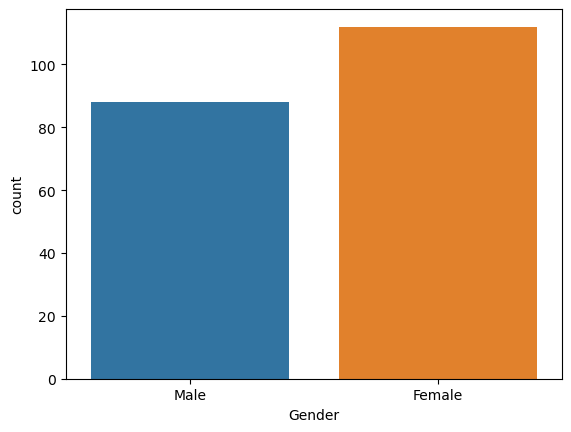

In [ ]:
sns.countplot(x=df['Gender'])

In [ ]:
# renaming some columns
df.rename(columns={"Annual Income (k$)":"Annual_Income","Spending Score (1-100)":"Spending_Score"},inplace=True)

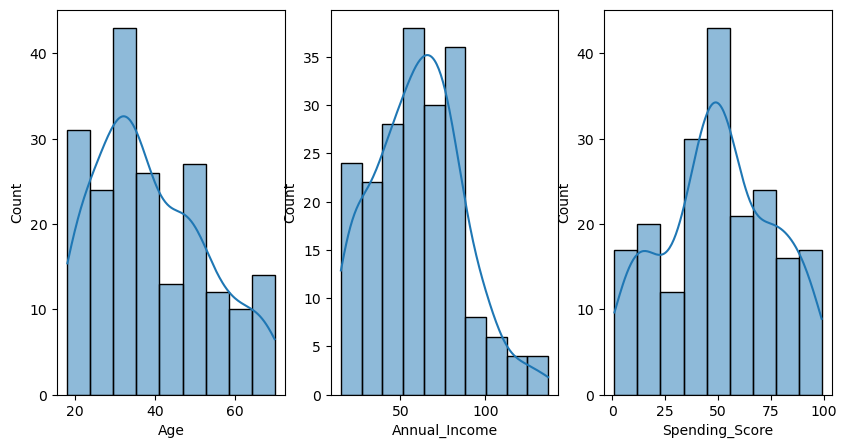

In [ ]:
x=1
plt.figure(figsize=(10,5))
for i in ['Age','Annual_Income',"Spending_Score"]:
    plt.subplot(1,3,x)
    sns.histplot(x=df[i],kde=True)
    x+=1

## Encoding

In [ ]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)

## Feature Scaling

In [ ]:
sc=StandardScaler()

df_scaled=sc.fit_transform(df)

## Elbow Method

In [ ]:
wcss=[]

n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i)
    kmean.fit(df_scaled)
    wcss.append(kmean.inertia_) #inertia_ gives Sum of squared distances of samples to their closest cluster center
    y_pred=kmean.predict(df_scaled)

Text(0, 0.5, 'wcss')

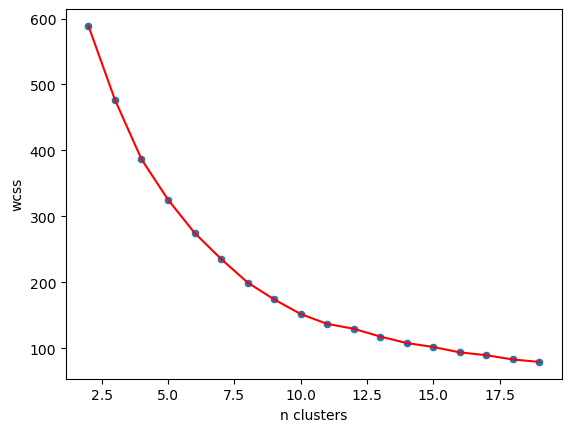

In [ ]:
sns.scatterplot(x=n_cluster,y=wcss)
plt.plot(n_cluster,wcss,c="red")
plt.xlabel("n clusters")
plt.ylabel("wcss")

## Building model by taking k=9

In [ ]:
cluster=KMeans(n_clusters=9)
cluster.fit(df_scaled)
y_pred=cluster.predict(df_scaled)

<AxesSubplot:xlabel='Age', ylabel='Annual_Income'>

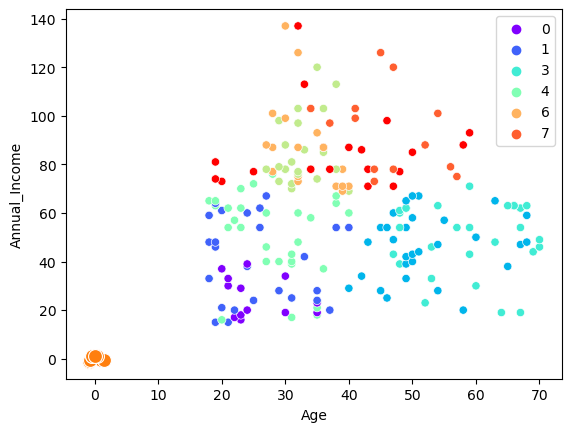

In [ ]:
plt.plot()
sns.scatterplot(x="Age",y="Annual_Income",hue=y_pred,data=df,palette="rainbow")
sns.scatterplot(x=cluster.cluster_centers_[:,1],y=cluster.cluster_centers_[:,2],s=100)

## Silhouette Method

In [ ]:
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)

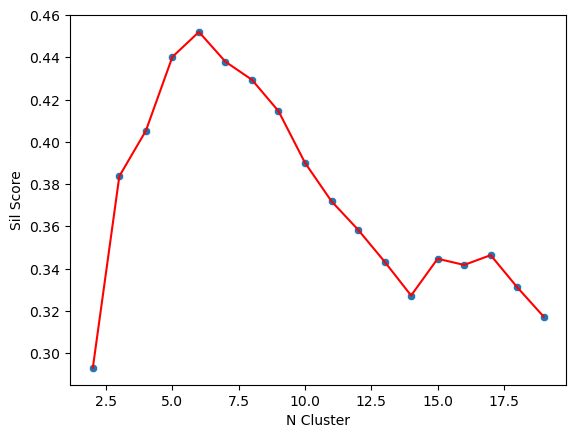

In [ ]:
plt.figure()
sns.scatterplot(x=n_cluster,y=sil)
sns.lineplot(x=n_cluster,y=sil,color = 'red')
plt.xlabel('N Cluster')
plt.ylabel('Sil Score')
plt.show()

### By using silhouette method we can select k value i.e. k=11

In [ ]:
cluster=KMeans(n_clusters=11)
cluster.fit(df_scaled)
y_pred=cluster.predict(df_scaled)

<AxesSubplot:xlabel='Age', ylabel='Annual_Income'>

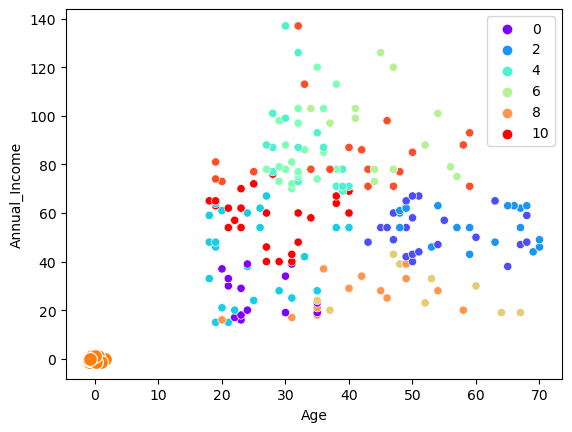

In [ ]:
plt.plot()
sns.scatterplot(x="Age",y="Annual_Income",hue=y_pred,data=df,palette="rainbow")
sns.scatterplot(x=cluster.cluster_centers_[:,1],y=cluster.cluster_centers_[:,2],s=100)

## Conclusion

* By using Elbow method we are getting good clusters than silhouette method. So we shall consider Elbow method for this dataset.